In [2]:
import pandas as pd
import json
import numpy as np
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [3]:
file = 'Resources/LA_temp_and_case_data_df.csv'
total_case_data_LA = pd.read_csv(file)
total_case_data_LA.head()

,dt_iso,city_name,lat,lon,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,totalcountconfirmed,totalcountdeaths
0,3/18/2020,Los Angeles,34.052234,-118.243685,50.826667,45.187917,45.707083,57.547083,1009.875000,53.333333,4.130417,47,0
1,3/19/2020,Los Angeles,34.052234,-118.243685,53.260417,47.539583,47.501667,58.482917,1012.791667,60.666667,6.117083,233,0
2,3/20/2020,Los Angeles,34.052234,-118.243685,54.625417,49.964167,49.251250,59.370417,1020.583333,61.875000,4.886667,267,1
3,3/21/2020,Los Angeles,34.052234,-118.243685,57.434583,53.649583,52.732917,61.844167,1018.833333,62.666667,4.392917,322,2
4,3/22/2020,Los Angeles,34.052234,-118.243685,56.878750,52.607083,52.165833,62.462500,1018.791667,59.750000,4.499583,384,3


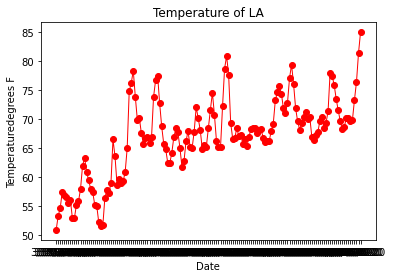

In [4]:
xvalue = total_case_data_LA['dt_iso']
yvalue = total_case_data_LA['temp']
cases = total_case_data_LA['totalcountconfirmed']
plt.plot(xvalue, yvalue, marker='o', color='red', linewidth=1)

plt.xlabel('Date')
plt.ylabel('Temperature' 
           'degrees F')


plt.title('Temperature of LA')
plt.savefig('Resources/Temperature_of_LA.jpg')
plt.show()
           

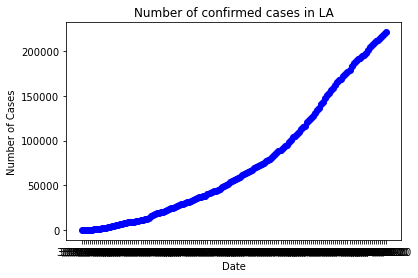

In [5]:
xvalue = total_case_data_LA['dt_iso']

cases = total_case_data_LA['totalcountconfirmed']
plt.plot(xvalue, cases, marker='o', color='blue', linewidth=1)

plt.xlabel('Date')
plt.ylabel('Number of Cases') 
plt.savefig('Resources/Cases_and_dates_for_LA.jpg')          
plt.title('Number of confirmed cases in LA')
plt.show()

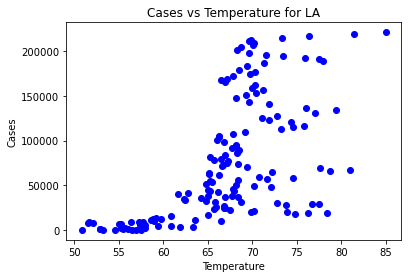

In [36]:
yvalue = total_case_data_LA['temp']
cases = cases = total_case_data_LA['totalcountconfirmed']
plt.scatter(yvalue, cases, marker='o', color='blue',)
plt.xlabel('Temperature')
plt.ylabel('Cases')
plt.title('Cases vs Temperature for LA')
plt.savefig('Resources/Cases_vs_Temperature_for_LA.jpg')

plt.show()



In [18]:
yvalue = total_case_data_LA['temp']
cases = cases = total_case_data_LA['totalcountconfirmed']
correlation = st.pearsonr(yvalue,cases)
print(f'Pearson Correlation is {round(correlation[0],2)}')

Pearson Correlation is 0.61


In [42]:
temperatures = total_case_data_LA['temp']
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 63.869375000000005
The upper quartile of temperatures is: 70.567291665
The interquartile range of temperatures is: 6.697916664999994
The the median of temperatures is: 67.66666667 
Values below 53.822500002500014 could be outliers.
Values above 80.6141666625 could be outliers.


In [43]:
temperatures = total_case_data_LA['totalcountconfirmed']
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of cases is: {lowerq}")
print(f"The upper quartile of cases is: {upperq}")
print(f"The interquartile range of cases is: {iqr}")
print(f"The the median of cases is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of cases is: 18848.5
The upper quartile of cases is: 124262.0
The interquartile range of cases is: 105413.5
The the median of cases is: 55899.0 
Values below -139271.75 could be outliers.
Values above 282382.25 could be outliers.


In [6]:
correlations = total_case_data_LA.corr()
correlations

,lat,lon,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,totalcountconfirmed,totalcountdeaths
lat,1.000000e+00,1.000000e+00,-1.365961e-15,1.842964e-15,1.056359e-15,-5.636957e-16,-2.654609e-13,-4.897500e-16,3.986524e-15,-1.489255e-15,5.322220e-16
lon,1.000000e+00,1.000000e+00,-1.284589e-15,2.153484e-15,1.541161e-15,-4.596660e-16,-2.654609e-13,-5.000741e-16,3.996835e-15,1.439613e-15,1.447010e-15
temp,-1.365961e-15,-1.284589e-15,1.000000e+00,9.848172e-01,9.844178e-01,9.885123e-01,-5.488780e-01,-2.686287e-01,-2.722987e-01,6.070648e-01,6.900471e-01
feels_like,1.842964e-15,2.153484e-15,9.848172e-01,1.000000e+00,9.657594e-01,9.802009e-01,-5.678986e-01,-1.072084e-01,-2.837599e-01,6.711283e-01,7.467428e-01
temp_min,1.056359e-15,1.541161e-15,9.844178e-01,9.657594e-01,1.000000e+00,9.514271e-01,-5.667543e-01,-2.666793e-01,-2.574457e-01,5.806816e-01,6.859612e-01
temp_max,-5.636957e-16,-4.596660e-16,9.885123e-01,9.802009e-01,9.514271e-01,1.000000e+00,-5.269769e-01,-2.459606e-01,-2.811056e-01,6.260452e-01,6.897134e-01
pressure,-2.654609e-13,-2.654609e-13,-5.488780e-01,-5.678986e-01,-5.667543e-01,-5.269769e-01,1.000000e+00,-5.350853e-02,-9.923951e-02,-4.341330e-01,-5.288058e-01
humidity,-4.897500e-16,-5.000741e-16,-2.686287e-01,-1.072084e-01,-2.666793e-01,-2.459606e-01,-5.350853e-02,1.000000e+00,2.155630e-01,2.317994e-01,2.049657e-01
wind_speed,3.986524e-15,3.996835e-15,-2.722987e-01,-2.837599e-01,-2.574457e-01,-2.811056e-01,-9.923951e-02,2.155630e-01,1.000000e+00,-6.241731e-02,-4.047361e-02
totalcountconfirmed,-1.489255e-15,1.439613e-15,6.070648e-01,6.711283e-01,5.806816e-01,6.260452e-01,-4.341330e-01,2.317994e-01,-6.241731e-02,1.000000e+00,9.640120e-01


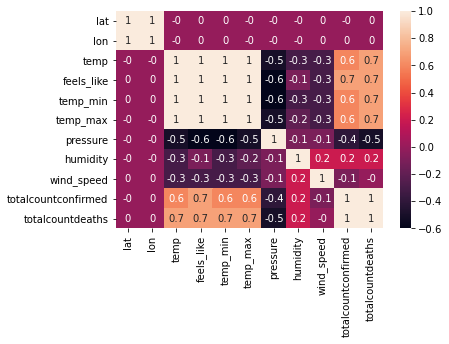

In [8]:
sns.heatmap(correlations.round(1), annot=True)
plt.savefig('Resources/heat_map_LA_data.jpg')

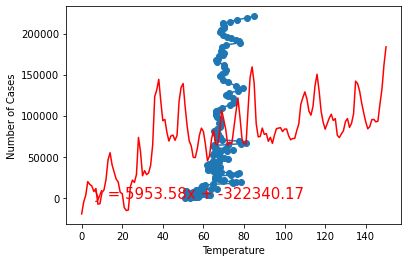

In [37]:
xvalue = total_case_data_LA['temp']
cases = total_case_data_LA['totalcountconfirmed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue,cases)
regress_values = xvalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalue,cases)
plt.plot(xvalue, cases,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature')
plt.ylabel('Number of Cases')
plt.savefig('Resources/Cases_vs_Temperature_for_LA_lineregression.jpg')
plt.show()